#Chapter 5

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# fix the unicode encoding error
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

##Download weather data from website - .read_csv
Canadian weather data found [here](http://climate.weather.gc.ca/index_e.html).  
Get hourly data automatically.

In [7]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url = url_template.format(month=3, year=2012) # specify the month and year we want
weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)

In [13]:
weather_mar2012

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 05:00:00,2012,3,1,05:00,,-5.3,NaN,-7.9,NaN,82,...,NaN,2.4,NaN,100.58,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 06:00:00,2012,3,1,06:00,,-5.2,NaN,-7.8,NaN,82,...,NaN,4.0,NaN,100.57,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 07:00:00,2012,3,1,07:00,,-4.9,NaN,-7.4,NaN,83,...,NaN,1.6,NaN,100.59,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 08:00:00,2012,3,1,08:00,,-5.0,NaN,-7.5,NaN,83,...,NaN,1.2,NaN,100.59,NaN,NaN,NaN,-13,NaN,Snow


Fix column indexes by hand to avoid strange symbols

In [21]:
weather_mar2012.columns

Index([u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (Â°C)', u'Temp Flag', u'Dew Point Temp (Â°C)', u'Dew Point Temp Flag', u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag', u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', u'Wind Chill Flag', u'Weather'], dtype='object')

In [23]:
weather_mar2012.columns = [u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', u'Temp Flag', 
                           u'Dew Point Temp (C)', u'Dew Point Temp Flag', u'Rel Hum (%)', u'Rel Hum Flag', 
                           u'Wind Dir (10s deg)', u'Wind Dir Flag', u'Wind Spd (km/h)', u'Wind Spd Flag', 
                           u'Visibility (km)', u'Visibility Flag', u'Stn Press (kPa)', u'Stn Press Flag', 
                           u'Hmdx', u'Hmdx Flag', u'Wind Chill', u'Wind Chill Flag', u'Weather']

**Drop columns that contain NA.**  
    `axis=0`: drop rows, `axis=1`: drop columns.  
    `how='any'` drops rows/columns if any value is Null. `how='all'` drops rows/columns if all values are Null. 

In [25]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Year,Month,Day,Time,Data Quality,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,-7.8,83,35,1.6,100.62,Snow


**Drop columns by label**

In [26]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
weather_mar2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


##Plotting by hour of the day

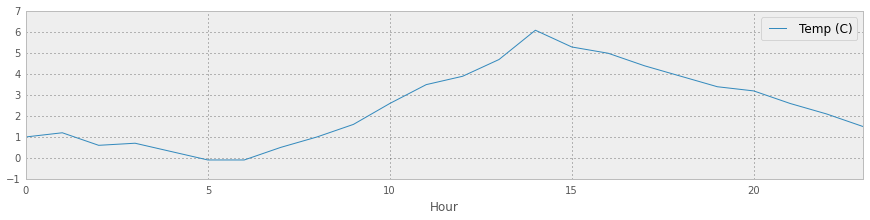

In [38]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
temperatures.loc[:,'Hour'] = temperatures.index.hour
temperatures.groupby('Hour').agg(np.median).plot()

##Getting more data - a year

In [62]:
def download_weather_month(year, month):
#     if month == 1:
#         year += 1
#     bug of the website has been fixe so not necessary
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, header=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

Store the 12 monthly dataframes in a list, then merge them by row.

In [70]:
year = 2012
data_by_month = [download_weather_month(year, i) for i in range(1, 13)]

(8784, 7)

In [71]:
weather_2012 = pd.concat(data_by_month) # by default axis=0
weather_2012.shape

(8784, 7)

##Export  - .to_csv

In [72]:
weather_2012.to_csv('data/weather_2012.csv')

## For a big picture of the whole year

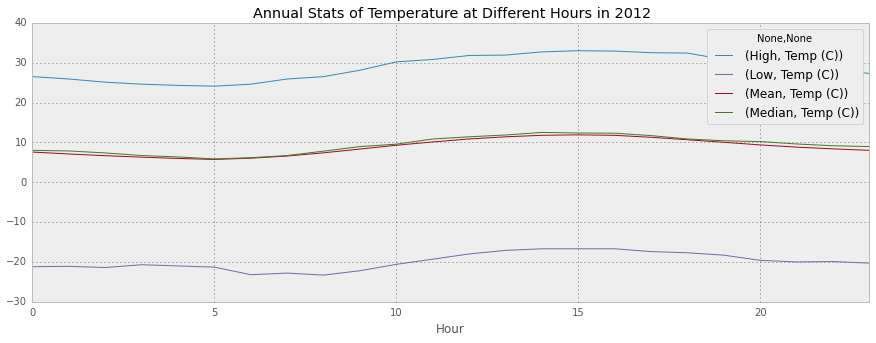

In [103]:
temp_2012 = weather_2012[[u'Temp (C)']].copy()
temp_2012.loc[:,'Hour'] = temp_2012.index.hour
high = temp_2012.groupby('Hour').agg(np.max)
low = temp_2012.groupby('Hour').agg(np.min)
mean = temp_2012.groupby('Hour').agg(np.mean)
median = temp_2012.groupby('Hour').agg(np.median)
year_temp_stat = pd.concat([high, low, mean, median], axis=1,keys=['High', 'Low', 'Mean', 'Median'])
year_temp_stat.plot(figsize=(15,5), title="Annual Stats of Temperature at Different Hours in 2012")

It seems the annual mean and median temperature at different hours are really close.

##Summary
+ `str = "random string {var1} more string {var2} even more string"`  
  `str.format(var1=aaa, var2=bbb)`  
+ `pd.read_csv(url, skiprows, header)`  
+ `pd.columns = ['index1', 'index2', ...]`  
+ `pd.dropna(axis= , how= )`  
+ `pd.drop([keys], axis=)`  
+ `weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]` replace strings  
+ `data_by_month = [download_weather_month(year, i) for i in range(1, 13)]` download data for a year  
+ `temp_2012 = weather_2012[[u'Temp (C)']].copy()` double brakets for dataframe!  